In [6]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")

In [14]:
X = df.iloc[:, 1:53]
X.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [9]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))
scaled_X.columns = X.columns

In [10]:
scaled_X

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,0.173919,0.228600,0.046817,-0.126810,0.261727,0.197725,0.320853,0.875257,-0.279445,0.328879,...,-0.387468,-0.117234,-0.038696,0.126936,0.282397,-0.496182,-0.149293,-0.264773,-0.368283,0.116307
1,-0.157764,-0.249221,-0.490115,-0.569780,-0.196719,-0.660624,-0.278886,-0.504996,-0.500980,-0.508909,...,-0.563807,-0.384055,-0.306157,-0.664272,-0.664694,-0.408684,-0.327608,-0.722036,-0.272919,-0.930582
2,-0.157764,0.148963,-0.106592,-0.052982,0.032504,-0.114402,-0.203919,0.261811,0.163624,-0.280421,...,-0.211129,0.505347,-0.306157,-0.312624,-0.148099,-0.058692,0.474812,-0.081868,-0.082193,-0.197760
3,0.256839,-0.089947,0.276931,-0.348295,-0.043904,-0.270465,-0.053984,0.261811,0.237469,0.100392,...,0.053380,0.149586,-0.484464,-0.400536,-0.234198,-0.058692,0.474812,-0.081868,-0.177556,-0.093071
4,-0.074843,-0.328858,0.276931,0.094675,-0.273127,-0.192434,-0.053984,0.338492,-0.057910,-0.051933,...,-0.122959,0.238526,-0.127849,0.302760,-0.234198,-0.233688,-0.327608,0.192490,-0.082193,0.011618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,-0.738209,-0.727041,-0.643524,-0.717437,-0.731573,-0.582593,-0.653723,-0.735038,-0.722515,-0.661234,...,-0.740146,-0.650875,-0.662772,-0.752183,-0.750793,-0.671179,-0.773397,-0.813488,-0.654372,-0.930582
807,-0.738209,-0.647405,-0.720229,-0.717437,-0.655165,-0.582593,-0.578755,-0.274954,-0.722515,-0.661234,...,-0.475637,-0.472995,-0.395311,-0.576360,-0.406396,-0.321186,-0.327608,-0.356225,-0.272919,-0.407138
808,-0.655288,-0.727041,-0.720229,-0.717437,-0.655165,-0.660624,-0.578755,-0.658357,-0.648670,-0.737396,...,-0.563807,-0.739815,-0.751926,-0.576360,-0.578595,-0.758677,-0.773397,-0.813488,-0.463646,-0.616515
809,-0.738209,-0.727041,-0.720229,-0.643608,-0.731573,-0.738656,-0.728690,-0.735038,-0.648670,-0.737396,...,-0.740146,-0.739815,-0.751926,-0.664272,-0.664694,-0.758677,-0.773397,-0.813488,-0.654372,-0.930582


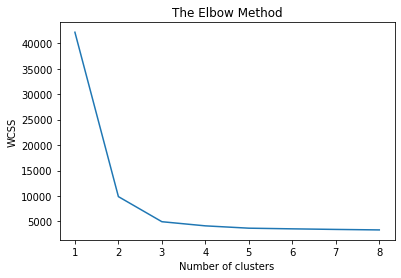

In [11]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_X)

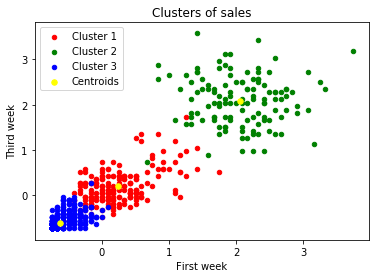

In [13]:
plt.scatter(scaled_X[y_kmeans == 0]['W0'], scaled_X[y_kmeans == 0]['W2'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_X[y_kmeans == 1]['W0'], scaled_X[y_kmeans == 1]['W2'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_X[y_kmeans == 2]['W0'], scaled_X[y_kmeans == 2]['W2'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()